In [136]:
import pandas as pd
import numpy as np

filename = "train.csv"
df = pd.read_csv(filename)
print(df.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [0]:
def reset_df():
  global df
  df = pd.read_csv("train.csv")

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
class Visualizer:
  def __init__(self):
    pass

  def getCrossTab(self, feature_name, label, dataframe):
    data_ct = pd.crosstab(dataframe[feature_name], dataframe[label], margins = False)
    return data_ct

  def drawBoxPlot(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
      sns.boxplot(x=label, y = feature, data = df_)
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          sns.boxplot(x=label, y=feature[d], data=df_, ax = ax[row, col])
          d += 1
          if d >= len(feature):
            return

  def drawHist(self, feature, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
        plt.hist(df_[feature])
      
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          ax[row, col].hist(df_[feature[d]])
          ax[row, col].set_xlabel(feature[d])
          d += 1
          if d >= len(feature):
            return

  def simplePlot(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots: 
     plt.plot(df_[feature], df_[label])
    else:
      fig, ax = plt.subplots(nrows, ncolumns, figsize = (15,15))
      fig.subplots_adjust(hspace = 0.8, wspace = 0.8)
      d = 0
      for row in range(nrows):
        for col in range(ncolumns):
          ax[row, col].plot(df_[feature[d]], df_[label])
          ax[row, col].set_xlabel(feature[d])
          d += 1
          if d >= len(feature):
            return

  def hexBins(self, feature, label, df_, subplots = False, nrows = 0, ncolumns = 0):
    if not subplots:
      x = df_[feature]
      y = df_[label]
      plt.hexbin(x, y, gridsize=30, cmap='Blues')


In [0]:
null_cols = df.columns[df.isnull().any()].tolist()
transform_cols = ["Mileage", "Engine", "Power"]

In [0]:
reset_df()

In [0]:
for x in range(df.shape[0]):
    val = df.loc[x, "Engine"]
    i = 0
    if not (type(val) == float):
      df.loc[x, "Engine"] = int((df.loc[x, "Engine"]).split()[0])

In [0]:
for x in range(df.shape[0]):
    val = df.loc[x, "Mileage"]
    i = 0
    if not (type(val) == float):
      df.loc[x, "Mileage"] = float((df.loc[x, "Mileage"]).split()[0])


In [143]:
df.loc[:,"Power"]

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [0]:
for x in range(df.shape[0]):
    val = df.loc[x, "Power"]
    i = 0
    if (not (type(val) == float)) and val.split()[0] != 'null':
      df.loc[x, "Power"] = float((df.loc[x, "Power"]).split()[0])


In [145]:
import math 
for x in range(df["Engine"].shape[0]):
  if type(df.loc[x, 'Engine']) == float:
    print(math.isnan(df.loc[x,"Engine"]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [0]:
nan_value = df.loc[194, "Power"] 

In [0]:
df.loc[df["Power"] == 'null bhp',"Power"] = np.nan

In [93]:
df.loc[df["Power"].isnull(),"Power"]

76      NaN
79      NaN
89      NaN
120     NaN
143     NaN
       ... 
5873    NaN
5893    NaN
5925    NaN
5943    NaN
5985    NaN
Name: Power, Length: 143, dtype: object

In [97]:
df.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine               False
Power                False
Seats                 True
New_Price             True
Price                False
dtype: bool

In [117]:
df_copy = pd.read_csv("train.csv")

df["Seats"] = df_copy["Seats"]
df["Seats"].isnull().any()

True

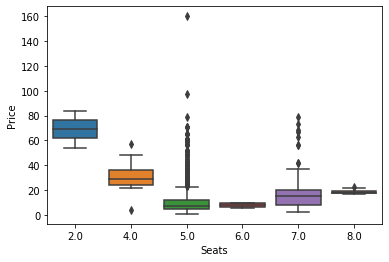

In [114]:
sns.boxplot(x = "Seats", y = "Price", data = df.dropna())

In [148]:
df.isnull().any()


Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
Price                False
dtype: bool

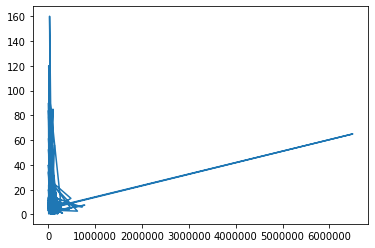

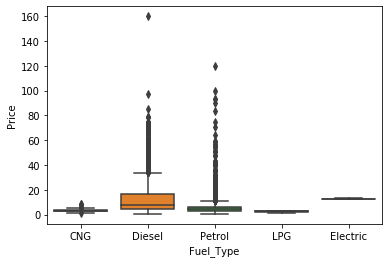

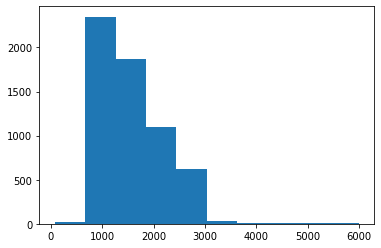

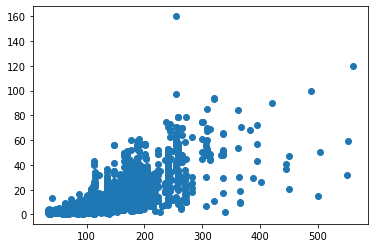

In [147]:
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
seats_imp = SimpleImputer(strategy="most_frequent")
mileage_imp = SimpleImputer(strategy = "most_frequent")
df = df.drop("New_Price", axis = 1)
# knni = KNNImputer(n_neighbors = 2, weights = 'normal')
df["Mileage"] = mileage_imp.fit_transform(np.array(df["Mileage"]).reshape(-1,1))
df["Seats"] = seats_imp.fit_transform(np.array(df["Seats"]).reshape(-1,1))
si = SimpleImputer(strategy = 'mean')
df['Engine'] = si.fit_transform(np.array(df['Engine']).reshape(-1,1))
si_new = SimpleImputer(missing_values = np.nan, strategy="mean")
df['Power'] = si_new.fit_transform(np.array(df["Power"]).reshape(-1,1))
visualizer = Visualizer()
feature_name = "Price"
label = "Kilometers_Driven"
visualizer.simplePlot(feature = label, label = feature_name, df_ = df)
label = "Fuel_Type"
plt.figure()
visualizer.drawBoxPlot(feature = feature_name, label = label, df_=df)
plt.figure()
visualizer.drawHist(feature = "Engine", df_ = df)
plt.figure()
plt.scatter(df["Power"], df["Price"])

In [173]:
df.loc[df["Mileage"] == 0,"Mileage"]

14      0
67      0
79      0
194     0
229     0
       ..
5647    0
5875    0
5943    0
5972    0
6011    0
Name: Mileage, Length: 68, dtype: object

['Year' 'Price']
      Year     Price
Year                
2010  2010  1.750000
2012  2012  2.716667
2013  2013  3.037500
2014  2014  3.203333
2015  2015  3.666667
2016  2016  3.300000
['Year' 'Price']
      Year      Price
Year                 
2015  2015  11.508333
2016  2016  13.253333
2017  2017  13.220000
['Year' 'Price']
      Year  Price
Year             
2011  2011    4.5
2015  2015    6.3
2016  2016    5.9
2017  2017    6.8
['Year' 'Price']
      Year     Price
Year                
2012  2012  5.802000
2013  2013  6.483333
2014  2014  6.331667
2015  2015  6.910000
2016  2016  7.618000
2017  2017  7.890000
2018  2018  8.870000
['Year' 'Price']
      Year  Price
Year             
2008  2008   9.75
2012  2012  12.06
2013  2013  17.74
['Year' 'Price']
      Year  Price
Year             
2012  2012   2.35


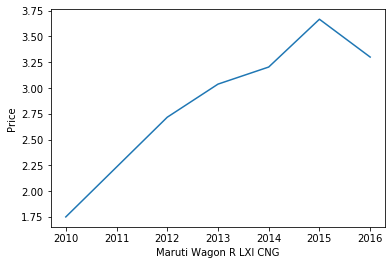

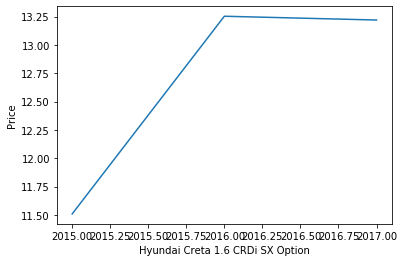

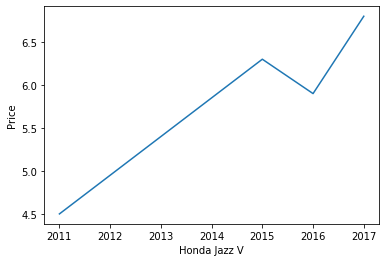

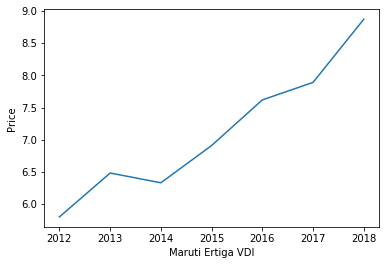

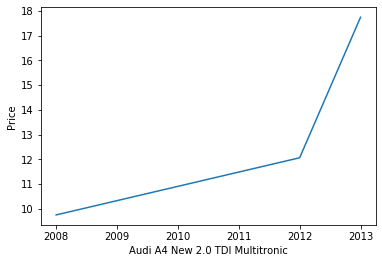

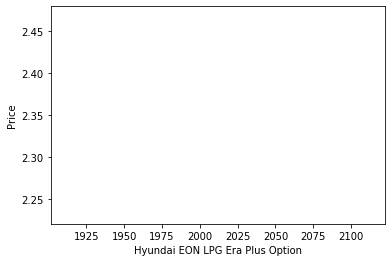

In [228]:
unique_vals = df["Name"].unique()[:6]
for k in unique_vals:
  temp = df.loc[df["Name"] == k, :]
  temp = temp.loc[:,["Year", "Price"]]
  print(temp.columns.values)
  temp = temp.groupby("Year").aggregate({"Year":"max", "Price":np.mean})
  print(temp)
  plt.figure()
  plt.plot(temp["Year"], temp["Price"])
  plt.xlabel(k)
  plt.ylabel("Price")

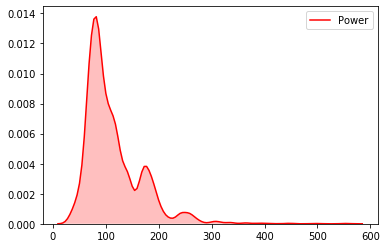

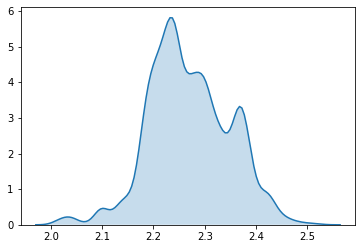

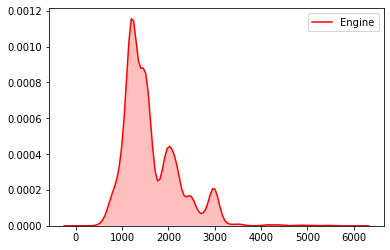

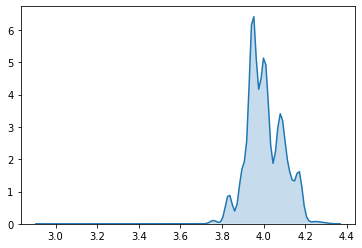

In [178]:
from scipy import stats
def box_cox(feature_name):
  global df
  df_eng = df[feature_name]
  df_eng, _ = stats.boxcox(df_eng)
  return df_eng
feature_names = ["Power","Engine"]
# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# fig, ax = plt.subplots(2, 3)
for i in range(2):
  df_eng = box_cox(feature_names[i])
  plt.figure()
  sns.kdeplot(df[feature_names[i]], color = 'r', shade = True)
  plt.figure()
  sns.kdeplot(df_eng, shade = True)

In [130]:
!pip install spstats

ERROR: Could not find a version that satisfies the requirement spstats (from versions: none)
ERROR: No matching distribution found for spstats
